## 1. 라이브러리 및 데이터 불러오기

In [1]:
# 분석에 필요한 라이브러리를 불러옵니다.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [115]:
# base_path = "C:/Users/gmlkd/data/시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/"
# train_err = pd.read_csv(base_path+"train_err_data.csv")
# train_problem = pd.read_csv(base_path+"train_problem_data.csv")
# train_quality = pd.read_csv(base_path+"train_quality_data.csv")
# test_err = pd.read_csv(base_path+"test_err_data.csv")
# test_quality = pd.read_csv(base_path+"test_quality_data.csv")
# submission = pd.read_csv(base_path+"sample_submission.csv")

C:\Users\gmlkd\AppData\Local\Temp\ipykernel_12148\2401973358.py:4: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  train_quality = pd.read_csv(base_path+"train_quality_data.csv")
C:\Users\gmlkd\AppData\Local\Temp\ipykernel_12148\2401973358.py:6: DtypeWarning: Columns (4,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  test_quality = pd.read_csv(base_path+"test_quality_data.csv")


In [133]:
# 결측치 처리 완료된 파일 불러오기

train_err = pd.read_csv("new_train_err.csv", parse_dates=['time'])
train_problem = pd.read_csv("new_train_problem.csv", parse_dates=['time'])
train_quality = pd.read_csv("new_train_quality.csv", parse_dates=['time'])
test_err = pd.read_csv("new_test_err.csv", parse_dates=['time'])
test_quality = pd.read_csv("new_test_quality.csv", parse_dates=['time'])
submission = pd.read_csv("C:/Users/gmlkd/data/시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/sample_submission.csv")

In [3]:
display(train_err.head(2))
display(test_err.head(2))
display(train_quality.head(2))
display(test_quality.head(2))
display(train_problem.head(2))

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1


,user_id,time,model_nm,fwver,errtype,errcode
0,30000,20201101030227,model_1,04.16.3553,31,1
1,30000,20201101030227,model_1,04.16.3553,33,2


,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
1,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0


,user_id,time
0,19224,20201102200000
1,23664,20201116140000


In [4]:
train_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   time      int64 
 2   model_nm  object
 3   fwver     object
 4   errtype   int64 
 5   errcode   object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB


In [5]:
train_problem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  5429 non-null   int64
 1   time     5429 non-null   int64
dtypes: int64(2)
memory usage: 85.0 KB


In [6]:
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  object 
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  object 
 11  quality_8   828624 non-null  object 
 12  quality_9   828624 non-null  object 
 13  quality_10  828624 non-null  object 
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 101.2+ MB


In [7]:
test_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747972 entries, 0 to 747971
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        747972 non-null  int64  
 1   user_id     747972 non-null  int64  
 2   fwver       725208 non-null  object 
 3   quality_0   641388 non-null  float64
 4   quality_1   747961 non-null  object 
 5   quality_2   726857 non-null  float64
 6   quality_3   747972 non-null  int64  
 7   quality_4   747972 non-null  int64  
 8   quality_5   747928 non-null  object 
 9   quality_6   747972 non-null  int64  
 10  quality_7   747972 non-null  object 
 11  quality_8   747972 non-null  object 
 12  quality_9   747972 non-null  object 
 13  quality_10  747972 non-null  object 
 14  quality_11  747972 non-null  int64  
 15  quality_12  747972 non-null  int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 91.3+ MB


## 2. 데이터 전처리

### 2-1. 결측치 처리

In [68]:
# time column을 datetype으로 변경

train_err['time'] = pd.to_datetime(train_err['time'], format='%Y%m%d%H%M%S')
train_problem['time'] = pd.to_datetime(train_problem['time'], format='%Y%m%d%H%M%S')
train_quality['time'] = pd.to_datetime(train_quality['time'], format='%Y%m%d%H%M%S')
test_err['time'] = pd.to_datetime(test_err['time'], format='%Y%m%d%H%M%S')
test_quality['time'] = pd.to_datetime(test_quality['time'], format='%Y%m%d%H%M%S')

#### train_err

In [69]:
train_err.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     1
dtype: int64

In [70]:
train_err[train_err.errcode.isnull()]

,user_id,time,model_nm,fwver,errtype,errcode
3825744,13639,2020-11-21 19:17:18,model_2,04.33.1261,5,NaN


In [71]:
# errcode 40013일 때와 user_id, time, model_nm, fwver, errtype모두 같다
train_err.iloc[3825742:3825747]

,user_id,time,model_nm,fwver,errtype,errcode
3825742,13639,2020-11-21 17:40:58,model_2,04.33.1261,31,1
3825743,13639,2020-11-21 17:41:10,model_2,04.33.1261,31,0
3825744,13639,2020-11-21 19:17:18,model_2,04.33.1261,5,NaN
3825745,13639,2020-11-21 19:17:18,model_2,04.33.1261,5,40013
3825746,13639,2020-11-21 22:09:19,model_2,04.33.1261,15,1


In [72]:
# 따라서 같은 errcode일 것임을 유추하여 40013값을 넣어준다.
train_err.errcode = train_err.errcode.fillna('40013')

In [73]:
train_err.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     0
dtype: int64

In [74]:
# train_err의 중복값 제거

print(train_err.shape)
train_err = train_err.drop_duplicates(subset=None, keep='first')
print(train_err.shape)

(16554663, 6)
(15368001, 6)


In [75]:
# model_nm, fwver, errcode encoding 필요

train_err.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15368001 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   user_id   int64         
 1   time      datetime64[ns]
 2   model_nm  object        
 3   fwver     object        
 4   errtype   int64         
 5   errcode   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 820.7+ MB


#### train_quality

In [76]:
train_quality.isnull().sum()

time          0
user_id       0
fwver         0
quality_0     0
quality_1     0
quality_2     0
quality_3     0
quality_4     0
quality_5     0
quality_6     0
quality_7     0
quality_8     0
quality_9     0
quality_10    0
quality_11    0
quality_12    0
dtype: int64

In [77]:
# 1. fwver 결측치

# case1. fwver=non을 이상치로 판단하고 모두 지우기
# case2. train_err에서 해당 user_id의 fwver값을 가져와 채우기

In [116]:
# train_err에는 fwver가 업그레이드 된 경우가 많이 있다.
# 결측치 비율이 적고, 어떤 fwver에서 로그가 찍혔는지 알기 힘드므로 case1 선택

fwver_null_index = train_quality[train_quality.fwver.isnull()].index

train_quality = train_quality.drop(fwver_null_index, axis=0)
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788544 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        788544 non-null  int64  
 1   user_id     788544 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   788544 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   788544 non-null  int64  
 7   quality_4   788544 non-null  int64  
 8   quality_5   788524 non-null  object 
 9   quality_6   788544 non-null  int64  
 10  quality_7   788544 non-null  object 
 11  quality_8   788544 non-null  object 
 12  quality_9   788544 non-null  object 
 13  quality_10  788544 non-null  object 
 14  quality_11  788544 non-null  int64  
 15  quality_12  788544 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 102.3+ MB


In [79]:
# 2. quality 결측치

# case1. 최빈값 채우기
# case2. 평균값 채우기

# quality_0
train_quality.quality_0.describe()

count    272452.000000
mean         10.786660
std         759.517259
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      157667.000000
Name: quality_0, dtype: float64

In [80]:
train_quality.quality_0.value_counts()

 0.0       237666
-1.0        25363
 1.0         1522
 2.0         1073
 3.0          438
            ...  
 1113.0         1
 1177.0         1
 1186.0         1
 946.0          1
 2351.0         1
Name: quality_0, Length: 753, dtype: int64

In [81]:
# quality_2
train_quality.quality_2.describe()

count    272452.000000
mean         14.158138
std         997.273716
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      191859.000000
Name: quality_2, dtype: float64

In [82]:
train_quality.quality_2.value_counts()

 0.0        233943
-1.0         28073
 1.0          2296
 2.0           900
 3.0           500
             ...  
 872.0           1
 11259.0         1
 373.0           1
 8278.0          1
 2351.0          1
Name: quality_2, Length: 798, dtype: int64

In [83]:
# quality_5
train_quality.quality_5.value_counts()

# -1, 0 ,1에 데이터가 편향되어있고, max값과 차이가 많이 나므로 평균보단 최빈값으로?

0         61044
1         29633
-1        28072
2         25140
3         16692
          ...  
8,415         1
9,812         1
10,490        1
10,821        1
9,558         1
Name: quality_5, Length: 4744, dtype: int64

In [117]:
# case1. 최빈값으로 채우기

for i in train_quality.columns[3:]:
    train_quality[i] = train_quality[i].fillna(train_quality[i].mode()[0])

In [118]:
train_quality.isnull().sum()

time          0
user_id       0
fwver         0
quality_0     0
quality_1     0
quality_2     0
quality_3     0
quality_4     0
quality_5     0
quality_6     0
quality_7     0
quality_8     0
quality_9     0
quality_10    0
quality_11    0
quality_12    0
dtype: int64

In [119]:
# train_quality 중복값 제거

print(train_quality.shape)
train_quality = train_quality.drop_duplicates(subset=None, keep='first')
print(train_quality.shape)

(788544, 16)
(272452, 16)


#### test_err

In [87]:
test_err.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     4
dtype: int64

In [88]:
test_err[test_err.errcode.isnull()] 

,user_id,time,model_nm,fwver,errtype,errcode
937967,30820,2020-11-15 04:43:17,model_2,04.33.1261,5,NaN
4038892,33681,2020-11-03 11:02:59,model_2,04.33.1185,5,NaN
9486881,38991,2020-11-27 21:38:38,model_2,04.33.1261,5,NaN
10425473,39894,2020-11-28 14:47:12,model_1,04.16.3553,5,NaN


In [89]:
# 40053으로 채우기
test_err.iloc[937965:937970]

,user_id,time,model_nm,fwver,errtype,errcode
937965,30820,2020-11-15 03:59:00,model_2,04.33.1261,40,1
937966,30820,2020-11-15 03:59:02,model_2,04.33.1261,40,0
937967,30820,2020-11-15 04:43:17,model_2,04.33.1261,5,NaN
937968,30820,2020-11-15 04:43:17,model_2,04.33.1261,5,40053
937969,30820,2020-11-15 09:10:24,model_2,04.33.1261,15,1


In [90]:
# 40053으로 채우기
test_err.iloc[4038890:4038895]

,user_id,time,model_nm,fwver,errtype,errcode
4038890,33681,2020-11-03 11:01:47,model_2,04.33.1185,14,14
4038891,33681,2020-11-03 11:02:59,model_2,04.33.1185,7,14
4038892,33681,2020-11-03 11:02:59,model_2,04.33.1185,5,NaN
4038893,33681,2020-11-03 11:02:59,model_2,04.33.1185,5,40053
4038894,33681,2020-11-03 11:03:00,model_2,04.33.1185,6,14


In [91]:
# 40053으로 채우기
test_err.iloc[9486879:9486883]

,user_id,time,model_nm,fwver,errtype,errcode
9486879,38991,2020-11-27 18:59:52,model_2,04.33.1261,5,B-A8002
9486880,38991,2020-11-27 21:38:38,model_2,04.33.1261,5,40053
9486881,38991,2020-11-27 21:38:38,model_2,04.33.1261,5,NaN
9486882,38991,2020-11-28 00:13:46,model_2,04.33.1261,26,1


In [92]:
# -1010으로 채우기
test_err.iloc[10425470:10425475]

,user_id,time,model_nm,fwver,errtype,errcode
10425470,39894,2020-11-28 14:46:05,model_1,04.16.3553,20,1
10425471,39894,2020-11-28 14:46:21,model_1,04.16.3553,26,1
10425472,39894,2020-11-28 14:47:12,model_1,04.16.3553,5,-1010
10425473,39894,2020-11-28 14:47:12,model_1,04.16.3553,5,NaN
10425474,39894,2020-11-28 14:47:57,model_1,04.16.3553,32,80


In [93]:
# 결측치 채우기
test_err.iloc[937967, 5] = '40053'
test_err.iloc[4038892, 5] = '40053'
test_err.iloc[9486881, 5] = '40053'
test_err.iloc[10425473, 5] = '-1010'

In [94]:
test_err.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     0
dtype: int64

In [95]:
# test_err 중복값 제거

print(test_err.shape)
test_err = test_err.drop_duplicates(subset=None, keep='first')
print(test_err.shape)

(16532648, 6)
(15527221, 6)


#### test_quality

In [96]:
test_quality.isnull().sum()

time               0
user_id            0
fwver          22764
quality_0     106584
quality_1         11
quality_2      21115
quality_3          0
quality_4          0
quality_5         44
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

In [97]:
# fwver결측치 제거

fwver_null_index = list(test_quality[test_quality.fwver.isnull()].index)

test_quality = test_quality.drop(fwver_null_index, axis=0)
test_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725208 entries, 0 to 747971
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        725208 non-null  datetime64[ns]
 1   user_id     725208 non-null  int64         
 2   fwver       725208 non-null  object        
 3   quality_0   639780 non-null  float64       
 4   quality_1   725197 non-null  object        
 5   quality_2   725177 non-null  float64       
 6   quality_3   725208 non-null  int64         
 7   quality_4   725208 non-null  int64         
 8   quality_5   725164 non-null  object        
 9   quality_6   725208 non-null  int64         
 10  quality_7   725208 non-null  object        
 11  quality_8   725208 non-null  object        
 12  quality_9   725208 non-null  object        
 13  quality_10  725208 non-null  object        
 14  quality_11  725208 non-null  int64         
 15  quality_12  725208 non-null  int64         
dtypes:

In [98]:
# quality_0 ~ 12 최빈값으로 채우기

for i in test_quality.columns[3:]:
    test_quality[i] = test_quality[i].fillna(test_quality[i].mode()[0])

In [99]:
test_quality.isnull().sum()

time          0
user_id       0
fwver         0
quality_0     0
quality_1     0
quality_2     0
quality_3     0
quality_4     0
quality_5     0
quality_6     0
quality_7     0
quality_8     0
quality_9     0
quality_10    0
quality_11    0
quality_12    0
dtype: int64

In [100]:
# test_quality 중복값 제거

print(test_quality.shape)
test_quality = test_quality.drop_duplicates(subset=None, keep='first')
print(test_quality.shape)

(725208, 16)
(237629, 16)


#### train_problem

In [101]:
train_problem.isnull().sum()

user_id    0
time       0
dtype: int64

### 2-2. encoding
#### quality_0~12 String to Int

In [102]:
# train/test_quality에서 쉼표로 인해 string형이 된  data 변경

def strToInt(x):
    if type(x) == str:
        x = x.replace(",", "")
        x = int(x)
        return x
    else:
        x = int(x)
        return x

In [103]:
# train_quality
for i in train_quality.columns[3:]:
    train_quality[i] = train_quality[i].apply(lambda x: strToInt(x))
    
# test_quality
for i in test_quality.columns[3:]:
    test_quality[i] = test_quality[i].apply(lambda x: strToInt(x))

In [104]:
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272452 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        272452 non-null  datetime64[ns]
 1   user_id     272452 non-null  int64         
 2   fwver       272452 non-null  object        
 3   quality_0   272452 non-null  int64         
 4   quality_1   272452 non-null  int64         
 5   quality_2   272452 non-null  int64         
 6   quality_3   272452 non-null  int64         
 7   quality_4   272452 non-null  int64         
 8   quality_5   272452 non-null  int64         
 9   quality_6   272452 non-null  int64         
 10  quality_7   272452 non-null  int64         
 11  quality_8   272452 non-null  int64         
 12  quality_9   272452 non-null  int64         
 13  quality_10  272452 non-null  int64         
 14  quality_11  272452 non-null  int64         
 15  quality_12  272452 non-null  int64         
dtypes:

In [105]:
test_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237629 entries, 0 to 747967
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        237629 non-null  datetime64[ns]
 1   user_id     237629 non-null  int64         
 2   fwver       237629 non-null  object        
 3   quality_0   237629 non-null  int64         
 4   quality_1   237629 non-null  int64         
 5   quality_2   237629 non-null  int64         
 6   quality_3   237629 non-null  int64         
 7   quality_4   237629 non-null  int64         
 8   quality_5   237629 non-null  int64         
 9   quality_6   237629 non-null  int64         
 10  quality_7   237629 non-null  int64         
 11  quality_8   237629 non-null  int64         
 12  quality_9   237629 non-null  int64         
 13  quality_10  237629 non-null  int64         
 14  quality_11  237629 non-null  int64         
 15  quality_12  237629 non-null  int64         
dtypes:

In [108]:
# 결측치 처리 완료된 dataframe 저장

# train_err.to_csv('new_train_err.csv', index=False)
# train_quality.to_csv('new_train_quality.csv', index=False)
# train_problem.to_csv('new_train_problem.csv', index=False)
# test_err.to_csv('new_test_err.csv', index=False)
# test_quality.to_csv('new_test_quality.csv', index=False)

## 2-2. 데이터 분석

In [106]:
train_err.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0


### 시간대별 분석

#### train_err

In [134]:
# 일별 에러 발생

# 비교적 주말에 에러가 많이 발생했다.
train_err.time.dt.day.value_counts()

21    562283
22    556151
15    554778
1     553561
7     551177
8     541958
28    527480
29    525630
14    520291
19    518417
6     516747
2     513572
23    513511
24    509559
9     507302
18    506377
5     502597
20    501508
26    499517
12    497408
10    497012
3     496842
27    492887
16    492638
25    492618
4     489363
11    488927
30    484872
17    483993
13    469020
31         5
Name: time, dtype: int64

In [135]:
# 11월 1일로 들어가도 될 것같다.
train_err[train_err.time.dt.day == 31]

,user_id,time,model_nm,fwver,errtype,errcode
5892567,15801,2020-10-31 23:59:59,model_0,04.22.1750,16,1
8533535,18418,2020-10-31 23:59:59,model_0,04.22.1750,26,1
11304925,20974,2020-10-31 23:59:59,model_0,04.22.1750,26,1
12545032,22249,2020-10-31 23:59:59,model_0,04.22.1750,26,1
12698894,22385,2020-10-31 23:59:59,model_2,04.33.1185,26,1


<AxesSubplot:xlabel='time', ylabel='Count'>

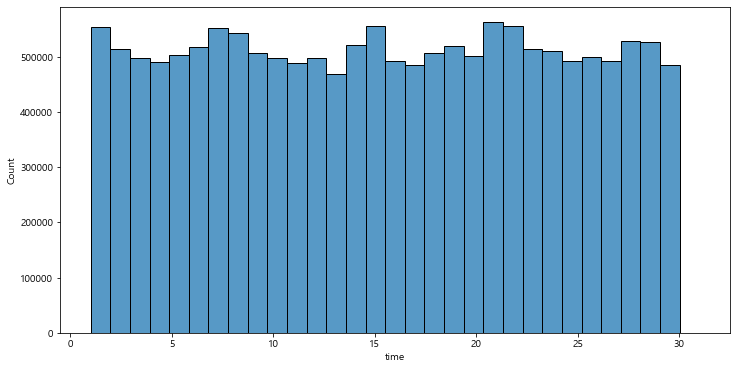

In [159]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_err, x=train_err.time.dt.day, bins=31)

In [151]:
# 시간대별 에러발생
train_err.time.dt.hour.value_counts()

19    824162
20    792258
21    791873
18    783808
22    729112
17    713929
8     677857
0     658982
2     648567
16    647170
3     645580
4     643244
9     637959
23    622782
7     618374
13    603780
15    600263
12    592900
10    592178
14    581045
11    575142
5     519059
6     444071
1     423906
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

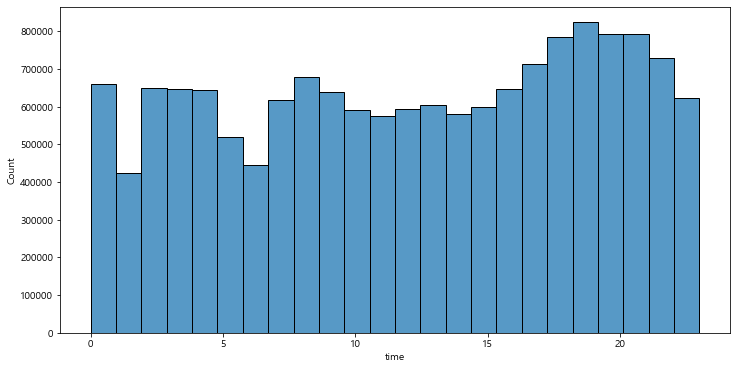

In [157]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_err, x=train_err.time.dt.hour, bins=24)

#### train_problem 

In [161]:
# 요일별 불만 제기 수

train_problem.time.dt.day_of_week.value_counts()

0    1332
2     868
4     853
1     809
3     809
5     431
6     327
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

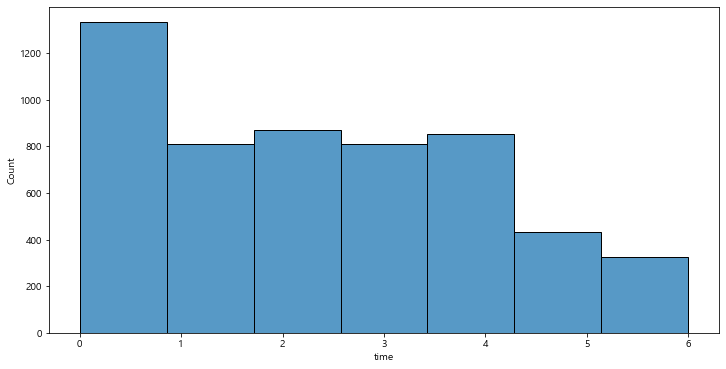

In [164]:
# 주말에 에러가 많이 발생하지만 불만 제기는 월요일이 가장 많다.
# 주말에는 고객센터가 문을 열지 않을 것이라 생각했을 수 있다.

plt.figure(figsize=(12,6))
sns.histplot(data=train_problem, x=train_problem.time.dt.day_of_week, bins=7)

In [165]:
# 시간대별 불만 제기 수
train_problem.time.dt.hour.value_counts()

12    627
11    600
13    518
19    507
18    492
15    489
16    460
17    432
22    233
20    233
14    228
21    204
23    175
0     108
1      67
2      15
10     14
9       8
5       5
8       5
3       4
4       3
7       1
6       1
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

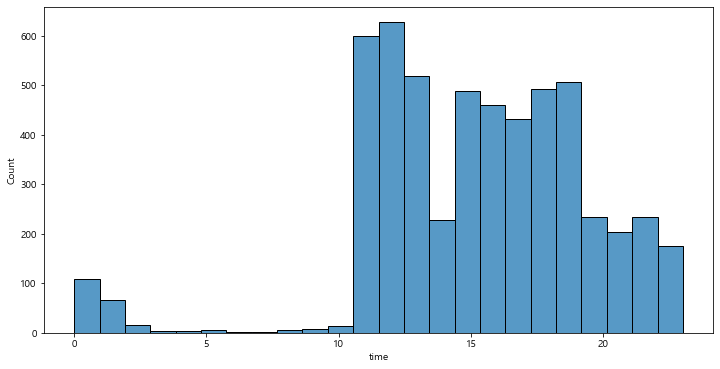

In [166]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_problem, x=train_problem.time.dt.hour, bins=24)

- 에러가 발생한 요일, 시간대는 큰 차이가 나지 않는다.
- 하지만 불만을 제기한 요일과 시간대는 꽤 유의미한 차이가 난다.
- 따라서 에러가 발생한 요일, 시간은 trian set에 넣어도 될 것 같다.

### 모델 번호 분석

In [171]:
train_err.model_nm.unique()

array(['model_3', 'model_2', 'model_0', 'model_1', 'model_7', 'model_4',
       'model_5', 'model_8', 'model_6'], dtype=object)

In [254]:
problem_id_list = list(train_problem.user_id)

In [324]:
len(problem_id_list)

5429

In [317]:
id_model = train_err.groupby('model_nm')['user_id'].unique().to_frame()
id_model

,user_id
model_nm,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100..."
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100..."
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100..."
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100..."
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102..."
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119..."
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114..."
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111..."
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114..."


In [318]:
id_model['count'] = 0

In [319]:
id_model.iloc[0]

user_id    [10004, 10005, 10007, 10008, 10011, 10013, 100...
count                                                      0
Name: model_0, dtype: object

In [320]:
for i in range(len(id_model.index)):
    for j in problem_id_list:
        if j in id_model.iloc[i, 0]:
            id_model.iloc[i, 1] += 1

In [321]:
id_model

,user_id,count
model_nm,,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100...",1769
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1426
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100...",1918
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100...",789
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",153
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119...",23
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114...",10
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111...",36
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114...",25


In [325]:
count_sum = id_model['count'].values.sum()
count_sum

6149

In [326]:
id_model['rate'] = id_model['count'] / count_sum * 100
id_model

,user_id,count,rate
model_nm,,,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100...",1769,28.768906
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1426,23.190763
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100...",1918,31.192064
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100...",789,12.831355
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",153,2.488209
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119...",23,0.374045
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114...",10,0.162628
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111...",36,0.585461
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114...",25,0.406570


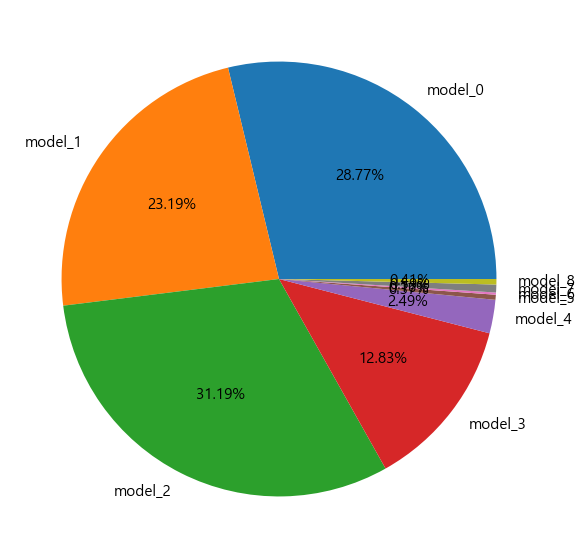

In [329]:
plt.figure(figsize=(10,10))
plt.pie(id_model['rate'], labels=id_model.index, autopct='%.2f%%', textprops={'fontsize':15})
plt.show()

### fwver 분석

In [188]:
print(sorted(train_err.fwver.unique()))

['03.11.1141', '03.11.1149', '03.11.1167', '04.16.2641', '04.16.3345', '04.16.3439', '04.16.3553', '04.16.3569', '04.16.3571', '04.22.1442', '04.22.1656', '04.22.1666', '04.22.1684', '04.22.1750', '04.22.1778', '04.33.1095', '04.33.1125', '04.33.1149', '04.33.1171', '04.33.1185', '04.33.1261', '04.73.2237', '04.73.2571', '04.82.1684', '04.82.1730', '04.82.1778', '05.15.2090', '05.15.2092', '05.15.2114', '05.15.2120', '05.15.2122', '05.15.2138', '05.15.3104', '05.66.3237', '05.66.3571', '10', '8.5.3']


In [186]:
train_err.fwver.value_counts()


04.16.3553    5145420
04.22.1750    2748374
04.33.1261    2375757
05.15.2138    1841272
04.22.1778    1243732
04.33.1185     911660
03.11.1167     845808
04.16.3571     142173
04.73.2237      31480
05.66.3237      30062
04.82.1684      21499
04.82.1778       7976
04.22.1684       5073
05.66.3571       3179
04.33.1149       2988
04.22.1442       2517
04.73.2571       2122
10               1501
03.11.1149       1299
04.16.3569        977
04.33.1095        858
05.15.2120        701
04.33.1125        402
04.16.2641        293
8.5.3             207
05.15.3104        171
04.16.3439        142
04.16.3345        101
04.82.1730         78
04.33.1171         58
04.22.1656         37
05.15.2122         23
05.15.2092         18
03.11.1141         17
05.15.2090         12
05.15.2114          9
04.22.1666          5
Name: fwver, dtype: int64

## 2-3. 이상치 검출

1) IQR(Inter-Quantile Range)


2) Outlier Detection method (e.g. Isolation Forest)

## 3. 예측 모델 구현

In [48]:
# 모델을 불러옵니다


In [49]:
# 학습에 필요한 데이터셋을 만듭니다


In [50]:
# 학습 및 모델 검증을 위해 KFold Cross Validation 기법을 사용합니다.


In [51]:
# training

In [52]:
# submission 파일 생성